In [91]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import nltk
import datetime

## Vader Lexicon Correlation

In [204]:
dftweets = pd.read_csv('sandp500processedVADER.csv', parse_dates = True)
dfmsft = pd.read_csv('msftprocessed.csv', parse_dates = True)
#dftweets = pd.concat([dftweets, dfmsft])

In [205]:
dftweets.head()
#dftweets = dftweets[ (dftweets['compound'] >= 0.20) | (dftweets['compound'] <= -0.20)]
dftweets = dftweets[dftweets['compound'] !=0]
'''
for i in range(0, len(list(dftweets['compound']))):
  if dftweets['compound'].iloc[i] > 0:
    dftweets['compound'].iloc[i] = 1
  else:
    dftweets['compound'].iloc[i] = -1
'''
dftweets.head()

,Unnamed: 0,Unnamed: 0.1,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,...,source,media,retweetedTweet,quotedTweet,mentionedUsers,negative,pos,neutral,compound,mood
0,0,3,https://twitter.com/DanChesler/status/11346048...,2019-05-31,fed will cut rates sending sp500 back near 2900,@YvesLamoureux Fed will cut rates sending sp50...,1134604834005536768,"{'username': 'DanChesler', 'displayname': 'Dan...",[],[],...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,"[{'username': 'YvesLamoureux', 'displayname': ...",0.208,0.000,0.792,-0.2732,negative
1,1,4,https://twitter.com/Felty256/status/1134603786...,2019-05-31,and mean does that fine because looks the only...,@ismailtarim977 @ToneVays @longhashdata And I ...,1134603786306117632,"{'username': 'Felty256', 'displayname': 'Felty...",[],[],...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,"[{'username': 'ismailtarim977', 'displayname':...",0.000,0.035,0.965,0.1027,positive
2,2,5,https://twitter.com/Raka45983547/status/113460...,2019-05-31,trade plan for next week should fall until 272...,Trade plan for next week :\nWe should fall unt...,1134603559549448192,"{'username': 'Raka45983547', 'displayname': 'R...",[],[],...,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,0.104,0.000,0.896,-0.5423,negative
3,3,13,https://twitter.com/JakobsZane/status/11345953...,2019-05-31,literally did class project that about become ...,@Mathpocalypse Literally did a class project t...,1134595317343461376,"{'username': 'JakobsZane', 'displayname': 'Zan...",[],[],...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,"[{'username': 'mathpocalypse', 'displayname': ...",0.166,0.133,0.701,-0.0813,neutral
4,4,17,https://twitter.com/caprioleio/status/11345942...,2019-05-31,and the djia dropped further 350 points and th...,And so the DJIA dropped a further 350 points a...,1134594245744971777,"{'username': 'caprioleio', 'displayname': 'Cha...",[],[],...,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,0.000,0.067,0.933,0.3612,positive


In [206]:
dfstocks = pd.read_csv('S&PFinanceData.csv', parse_dates = True)
dfstocks.head()
dfstocks.shape

(251, 7)

In [207]:
#getting difference between two days in the finance data added it to column Difference
#first classify 'Difference' table whether it went up or down (without numbers)
#connect to avg of tweets by day and then do correlation based on that


rowsdifference = dfstocks.iloc[:, 5]
#dfstocks.set_index('Date').diff()
rowsdifference.diff()

dfstocks['Difference'] = rowsdifference.diff()
dfstocks['Date'] = pd.to_datetime(dfstocks['Date'])
dfstocks['Difference'].iloc[0] = 0



dfstocks

,Date,Open,High,Low,Close,Adj Close,Volume,Difference
0,2018-06-01,2718.699951,2736.929932,2718.699951,2734.620117,2734.620117,3684130000,0.000000
1,2018-06-04,2741.669922,2749.159912,2740.540039,2746.870117,2746.870117,3376510000,12.250000
2,2018-06-05,2748.459961,2752.610107,2739.510010,2748.800049,2748.800049,3517790000,1.929932
3,2018-06-06,2753.250000,2772.389893,2748.459961,2772.350098,2772.350098,3651640000,23.550049
4,2018-06-07,2774.840088,2779.899902,2760.159912,2770.370117,2770.370117,3711330000,-1.979980
...,...,...,...,...,...,...,...,...
246,2019-05-24,2832.409912,2841.360107,2820.189941,2826.060059,2826.060059,2887390000,3.820068
247,2019-05-28,2830.030029,2840.510010,2801.580078,2802.389893,2802.389893,4121410000,-23.670166
248,2019-05-29,2790.250000,2792.030029,2766.060059,2783.020020,2783.020020,3700050000,-19.369873
249,2019-05-30,2786.939941,2799.000000,2776.739990,2788.860107,2788.860107,3273790000,5.840088


In [208]:
#average score of tweets by day in column compound
dftweets['date'] = pd.to_datetime(dftweets['date'])
dftweets = dftweets.groupby(['date'], as_index = False ).mean().sort_values('compound', ascending= True).reset_index()
dftweets.sort_values('date', inplace=True, ascending=True)
dftweets

,index,date,Unnamed: 0,Unnamed: 0.1,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,negative,pos,neutral,compound
47,0,2018-06-01,84233.458824,156867.294118,1.002527e+18,0.141176,0.388235,1.752941,0.047059,1.002191e+18,NaN,0.116506,0.159294,0.724212,0.096872
64,1,2018-06-02,84085.972973,156603.783784,1.002870e+18,0.270270,0.648649,2.054054,0.027027,1.002825e+18,NaN,0.129784,0.200351,0.669784,0.109716
218,2,2018-06-03,83989.659574,156444.914894,1.003277e+18,0.234043,0.957447,3.531915,0.000000,1.003202e+18,NaN,0.125596,0.159617,0.714830,0.201028
324,3,2018-06-04,83813.827586,156135.931034,1.003658e+18,0.234483,0.455172,2.172414,0.082759,1.003342e+18,NaN,0.065490,0.202800,0.731697,0.267467
348,4,2018-06-05,83507.657609,155566.777174,1.004001e+18,0.211957,0.554348,3.315217,0.086957,1.003546e+18,NaN,0.057402,0.198043,0.744560,0.307197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,360,2019-05-27,1351.191781,2593.465753,1.132989e+18,0.219178,0.219178,1.109589,0.000000,1.132922e+18,NaN,0.068767,0.198014,0.733178,0.195811
117,361,2019-05-28,1119.186667,2169.053333,1.133395e+18,0.240000,0.446667,2.153333,0.046667,1.131997e+18,NaN,0.089733,0.186813,0.723460,0.151688
16,362,2019-05-29,781.776316,1524.828947,1.133722e+18,0.289474,0.495614,2.315789,0.043860,1.132540e+18,NaN,0.109425,0.158820,0.731768,0.052610
40,363,2019-05-30,453.524823,863.290780,1.134094e+18,0.191489,0.262411,1.539007,0.049645,1.133627e+18,NaN,0.102461,0.169255,0.728319,0.085706


In [209]:
merged = pd.merge(left=dftweets, left_on='date',
         right=dfstocks, right_on='Date')
merged_sim  = merged[ ['Difference', 'compound']]


x = merged_sim.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
merged_sim = pd.DataFrame(x_scaled)
merged_sim['date'] = merged['date']
merged_sim.columns = ['Difference','compound','date']


from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
merged_sim['norm_score'] = quantile.fit_transform(np.array(merged_sim['compound']).reshape(-1,1) )
compound  = merged_sim.norm_score.quantile([0.25, 0.5, 0.75])
merged_sim.loc[merged_sim.norm_score >= 0.5, 'label'] = 1
merged_sim.loc[merged_sim.norm_score < 0.5, 'label'] = -1
merged_sim.head()

,Difference,compound,date,norm_score,label
0,0.448074,0.353673,2018-06-01,-1.027893,-1.0
1,0.506060,0.774909,2018-06-04,1.304685,1.0
2,0.457210,0.873011,2018-06-05,1.911036,1.0
3,0.559548,0.720977,2018-06-06,0.994458,1.0
4,0.438702,0.475783,2018-06-07,-0.490189,-1.0


0.20471572954579173


Text(27.0, 0.5, 'Difference in Price')

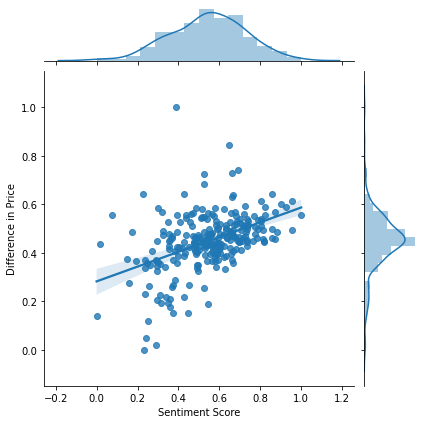

In [210]:
import seaborn as sns
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
print(r2(merged_sim['compound'], merged_sim['Difference']))

a = sns.jointplot(x="compound", y="Difference", data=merged_sim, kind="reg")
#sns.regplot(x="compound", y="Difference", data=merged)
plt.xlabel('Sentiment Score')
plt.ylabel('Difference in Price')
#plt.title('Sentiment vs. Difference in Stock Price')

In [213]:
for i in range(0, len(list(dfstocks['Difference']))):
  if dfstocks['Difference'].iloc[i] > 0:
    dfstocks['Difference'].iloc[i] = 1
  else:
    dfstocks['Difference'].iloc[i] = 0

In [214]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

for i in range(0, len(list(merged_sim['compound']))):
  if merged_sim['compound'].iloc[i] > 0.5:
    merged_sim['compound'].iloc[i] = 1
  else:
    merged_sim['compound'].iloc[i] = 0


'''
for i in range(0, len(list(merged_sim['Difference']))):
  if merged_sim['Difference'].iloc[i] > 0:
    merged_sim['Difference'].iloc[i] = 1
  else:
    merged_sim['Difference'].iloc[i] = -1
'''

cm = np.array(confusion_matrix(dfstocks['Difference'], merged_sim['compound']))
print(cm)
#cm = [ [cm[1][0], cm[1][2]] , [cm[2][0],cm[2][2]] ]
confusion = pd.DataFrame(cm, index = ['Decrease', 'Increase'], columns = ['Predicted Decrease', 'Predicted Increase'])
confusion

[[ 65  52]
 [ 30 104]]


,Predicted Decrease,Predicted Increase
Decrease,65,52
Increase,30,104


              precision    recall  f1-score   support

         0.0       0.68      0.56      0.61       117
         1.0       0.67      0.78      0.72       134

    accuracy                           0.67       251
   macro avg       0.68      0.67      0.67       251
weighted avg       0.67      0.67      0.67       251



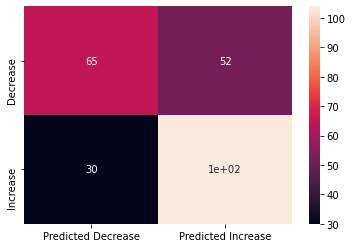

In [217]:
sns.heatmap(confusion,annot=True)
from sklearn.metrics import classification_report
print(classification_report(dfstocks['Difference'], merged_sim['compound']))

In [ ]:
'''
from pandas.tseries.offsets import BDay
isBusinessDay = BDay().is_on_offset
match = pd.to_datetime(dftweets['date']).map(isBusinessDay)
dftweets = dftweets[match]
#dftweets.set_index('date').reindex(index = dfstocks['Date'])
'''

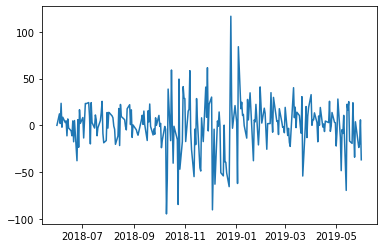

In [96]:
x = merged['Date']
y1 = merged['Difference']
#plt.xlim(datetime.date(2018,7,1) , datetime.date(2018,7,30))
plt.plot(x,y1)

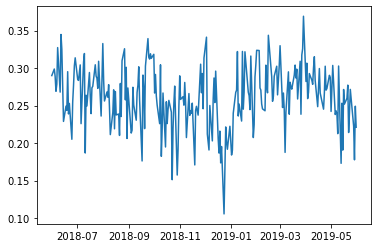

In [97]:
x = merged['Date']
y2 = merged['compound']
#plt.xlim(datetime.date(2018,7,1) , datetime.date(2018,7,30))
plt.plot(x,y2)

In [111]:
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
merged['norm_score'] = quantile.fit_transform(np.array(merged['compound']).reshape(-1,1) )
compound  = merged.norm_score.quantile([0.25, 0.5, 0.75])
#data_trans = quantile.fit_transform(compound)
#plt.hist(compound, bins=10)
compound

0.25   -0.674503
0.50    0.000000
0.75    0.674503
Name: norm_score, dtype: float64